In [1]:
from altaipony.lcio import from_mast
from altaipony.altai import find_iterative_median

import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


5, , 298907057

mast fail 332470458, 248223026, 204721469 (10), 127012050, 103282544 (9)

In [52]:
flc = from_mast(248223026, c=10, mission="TESS", cadence="short")

No data found for target "248223026".
No data found for target "248223026".
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


AttributeError: 'NoneType' object has no attribute 'get_lightcurve'

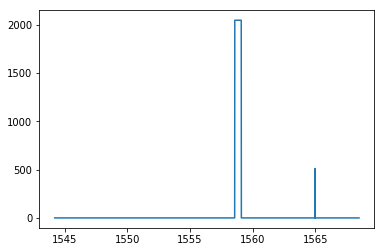

In [51]:
import numpy as np
plt.plot(flc.time, flc.quality)

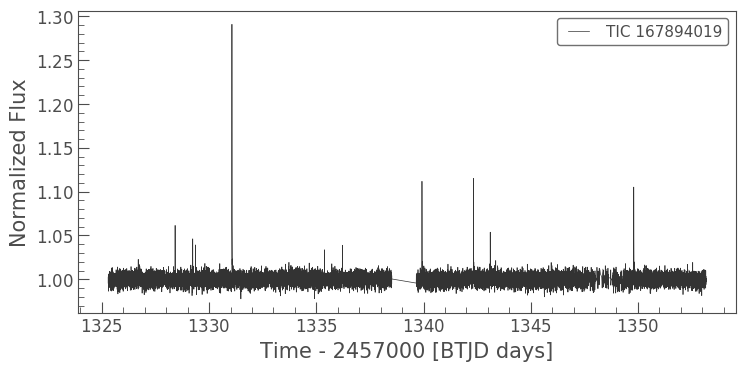

In [41]:
flc.plot()#
#plt.xlim(1518, 1520)

In [42]:
flcd = flc.detrend("savgol", window_length=555)
itmed = find_iterative_median(flcd).it_med


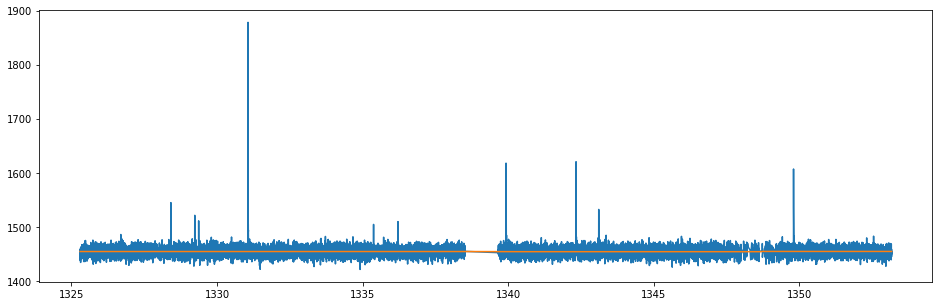

In [43]:
plt.figure(figsize=(16,5))
plt.plot(flcd.time, flcd.detrended_flux)
plt.plot(flcd.time, itmed)#+ 3*flcd.detrended_flux.std())
#plt.xlim(1518, 1520)

In [44]:
flcd.detrended_flux.std()
flcd.detrended_flux_err

array([7.720536 , 7.708183 , 7.7083106, ..., 7.8487415, 7.8413134,
       7.8565855], dtype=float32)

In [45]:
flcd.detrended_flux_err[:] = flcd.detrended_flux.std()
flcd.find_flares().flares

Found 1 candidate(s) in the (0,9223) gap.
Found 3 candidate(s) in the (9223,15240) gap.
Found 1 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,total_n_valid_data_points,tstart,tstop
0,0.291360,74599,74607,93.033720,1.679446,4017,4025,18104.0,1331.064366,1331.075478
1,0.112575,80980,80988,59.491219,1.943494,9415,9423,18104.0,1339.926813,1339.937924
2,0.114383,82713,82717,30.836653,1.350289,11122,11126,18104.0,1342.333753,1342.339309
3,0.053722,83273,83277,19.213059,1.515939,11680,11684,18104.0,1343.111531,1343.117086
4,0.104800,88092,88097,39.877486,1.583908,15706,15711,18104.0,1349.804580,1349.811525
